In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [4]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

In [6]:
import pandas as pd
print(pd.DataFrame(coco_demo.CATEGORIES).to_string())

                 0
0     __background
1           person
2          bicycle
3              car
4       motorcycle
5         airplane
6              bus
7            train
8            truck
9             boat
10   traffic light
11    fire hydrant
12       stop sign
13   parking meter
14           bench
15            bird
16             cat
17             dog
18           horse
19           sheep
20             cow
21        elephant
22            bear
23           zebra
24         giraffe
25        backpack
26        umbrella
27         handbag
28             tie
29        suitcase
30         frisbee
31            skis
32       snowboard
33     sports ball
34            kite
35    baseball bat
36  baseball glove
37      skateboard
38       surfboard
39   tennis racket
40          bottle
41      wine glass
42             cup
43            fork
44           knife
45           spoon
46            bowl
47          banana
48           apple
49        sandwich
50          orange
51        br

In [7]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

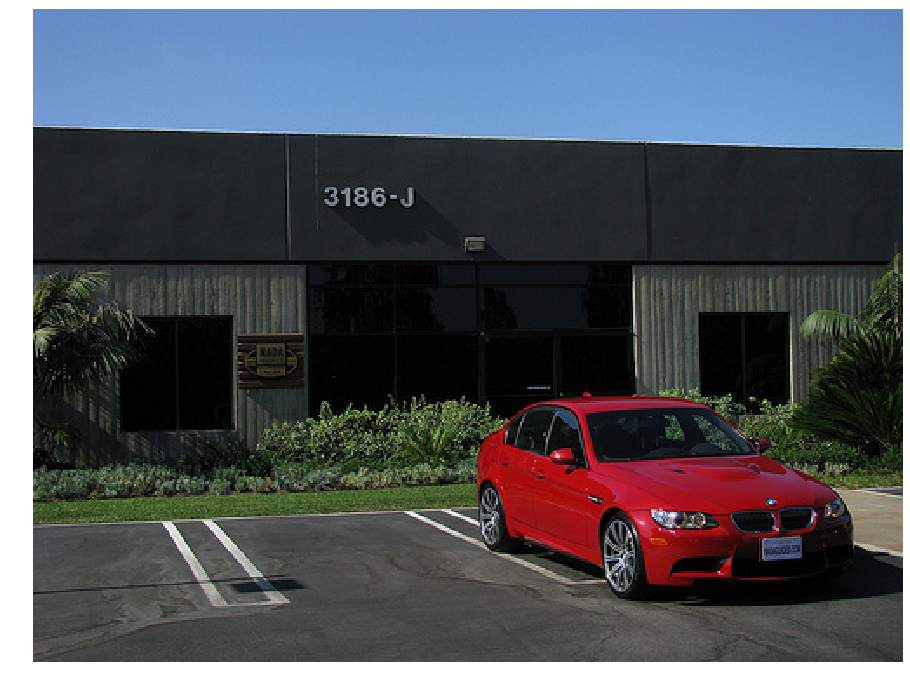

In [8]:
import cv2

image = cv2.imread("car4.jpg", cv2.IMREAD_COLOR)

imshow(image)

True


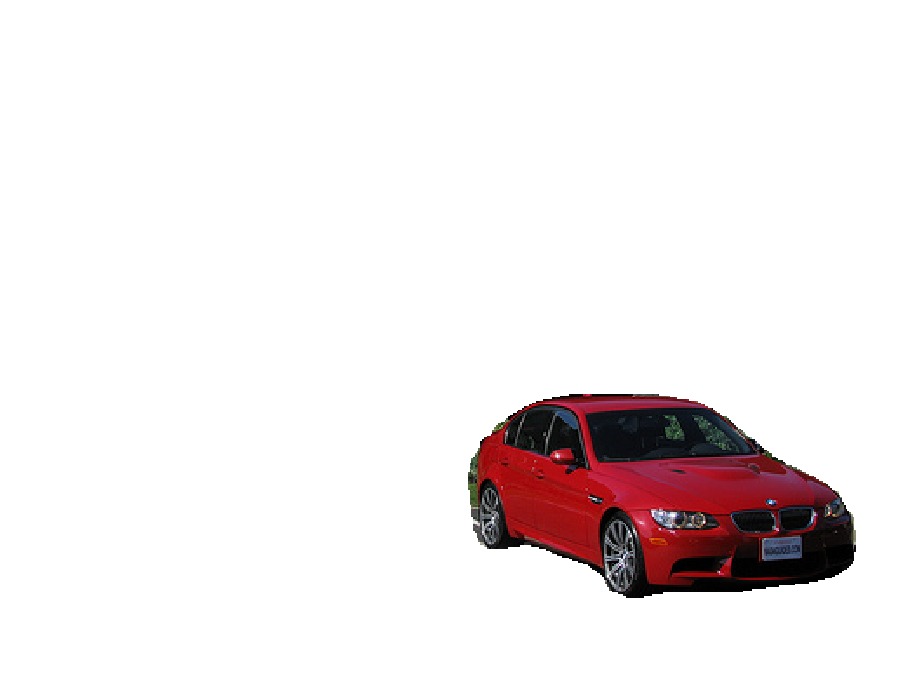

In [9]:
predictions,isfind = coco_demo.run_on_opencv_image(image,category = 3,is_crop = False)
print(isfind)
imshow(predictions)

True


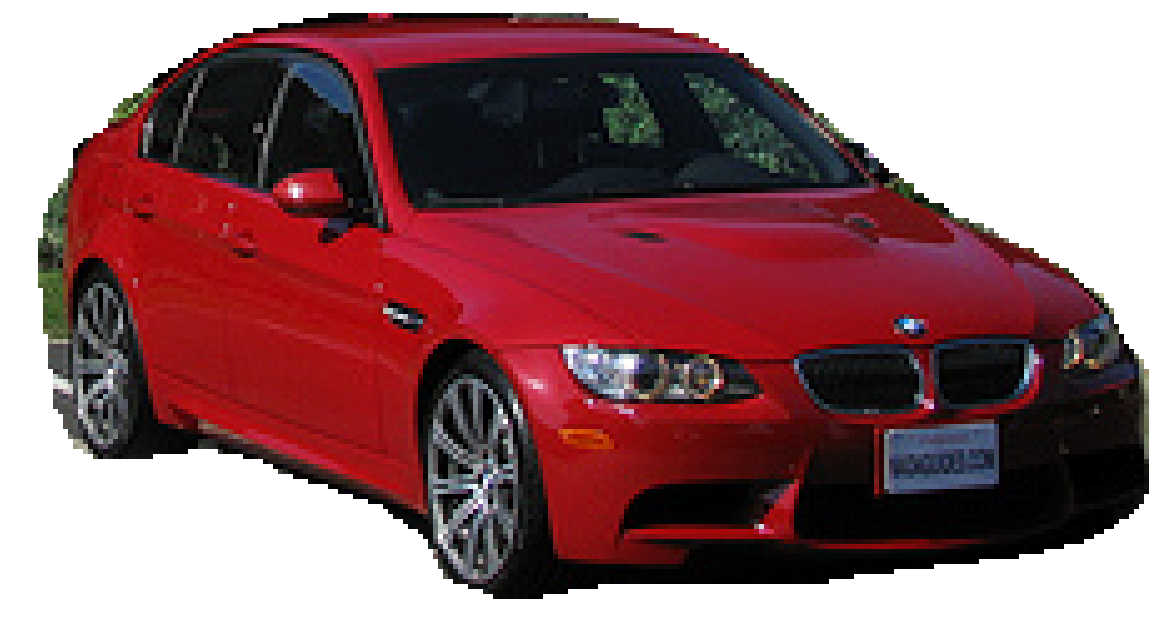

In [10]:
predictions,isfind = coco_demo.run_on_opencv_image(image,category = 3,is_crop = True)
print(isfind)
imshow(predictions)

In [11]:
# https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h
    else:     dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.ones((dif, dif), dtype=img.dtype)*255
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.ones((dif, dif, c), dtype=img.dtype)*255
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

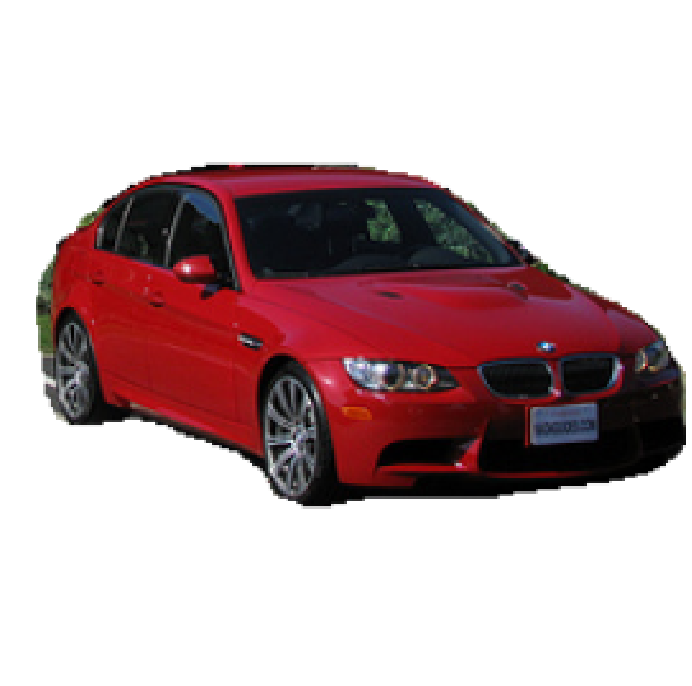

In [12]:
img = resize2SquareKeepingAspectRation(predictions, 256, cv2.INTER_AREA)
imshow(img)

In [13]:
#!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

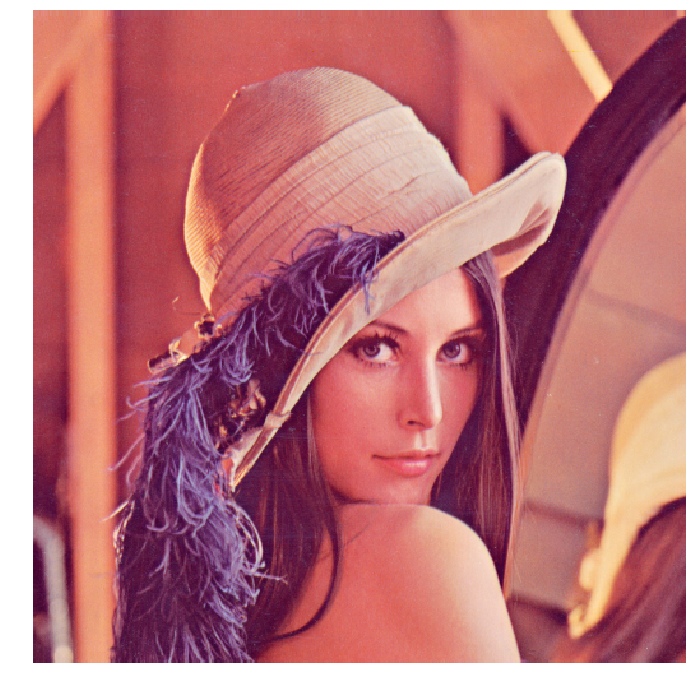

In [14]:
image_people = cv2.imread("Lenna_(test_image).png", cv2.IMREAD_COLOR)
imshow(image_people)

True


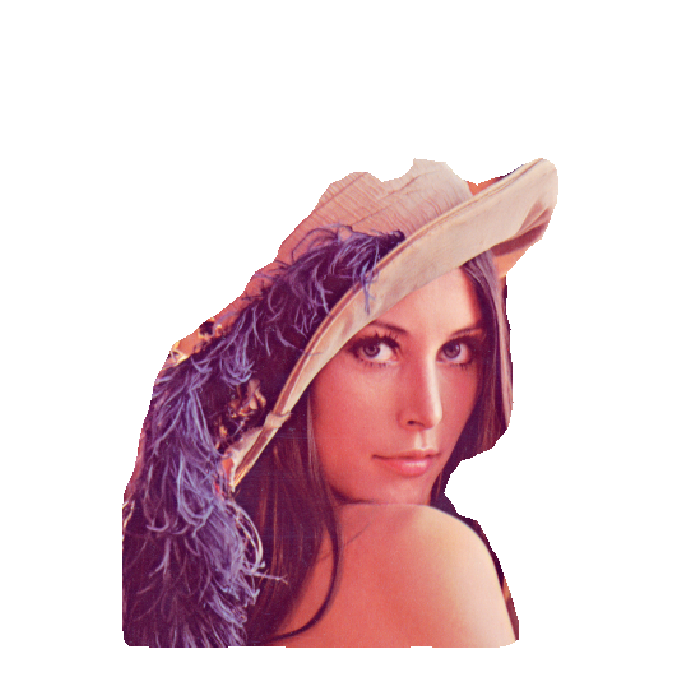

In [15]:
predictions,isfind = coco_demo.run_on_opencv_image(image_people,category = 1,is_crop = False)
print(isfind)
imshow(predictions)

In [21]:
# https://pixabay.com/photos/london-bus-double-decker-road-590114/

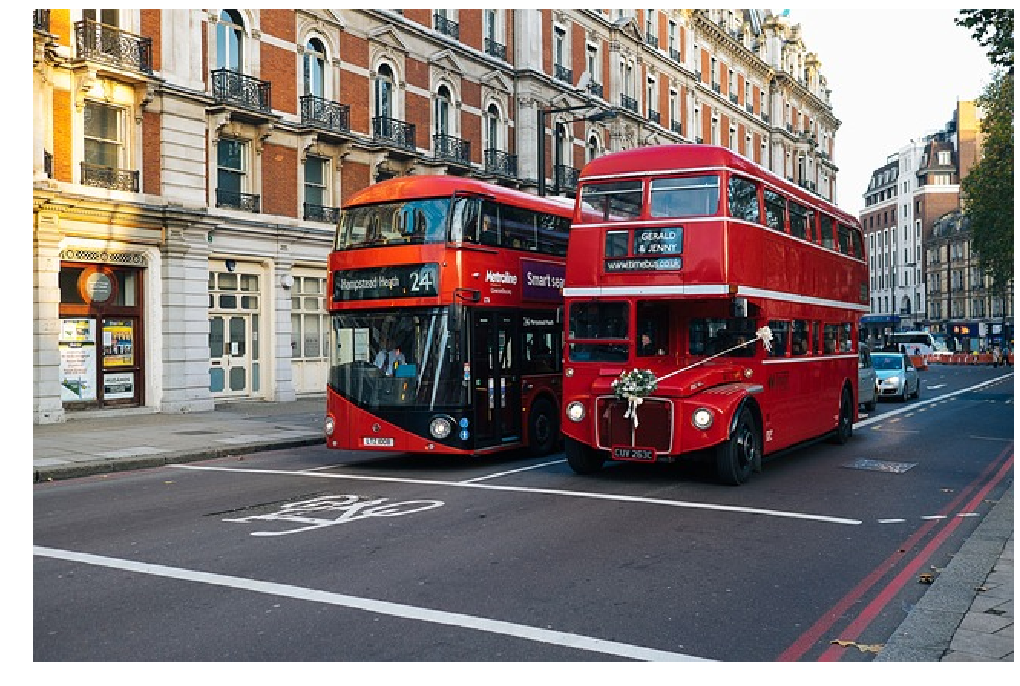

In [23]:
image_bus = cv2.imread("london-590114_640.jpg", cv2.IMREAD_COLOR)
imshow(image_people)

True


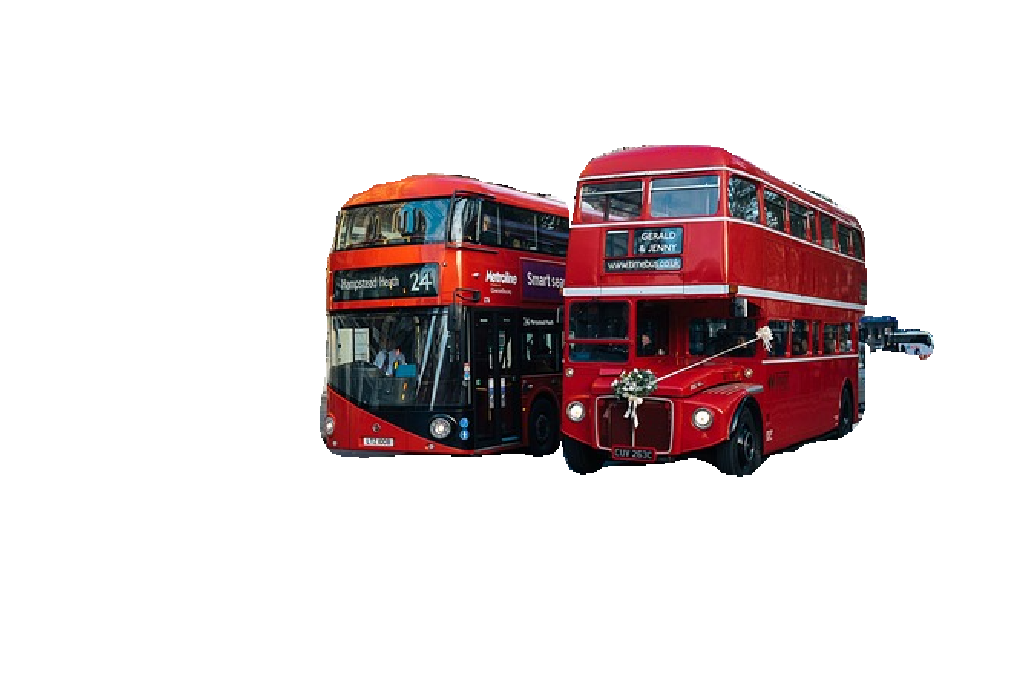

In [26]:
predictions,isfind = coco_demo.run_on_opencv_image(image_bus,category = 6,is_crop = False, multi_object = True)
print(isfind)
imshow(predictions)